In [2]:
#autoencoder

In [3]:
#import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [5]:
# Load dataset
data = pd.read_csv("creditcard.csv")

# Features and target
x = data.drop(["Time", "Class"], axis=1)
y = data["Class"]

# Scale the features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Train only on normal transactions (Class = 0)
x_train = x_scaled[y == 0]
x_test = x_scaled[y == 1]

In [6]:
# Autoencoder architecture
dim = x_train.shape[1]
print(dim)
input_layer = Input(shape=(dim,))
encoder = Dense(16, activation="relu")(input_layer)
encoder = Dense(8, activation="relu")(encoder)
latent = Dense(4, activation="relu")(encoder)
decoder = Dense(8, activation="relu")(latent)
decoder = Dense(16, activation="relu")(decoder)
output_layer = Dense(dim, activation="sigmoid")(decoder)

# Build model
model = Model(input_layer, output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

29


In [ ]:
# Train model
history = model.fit(
    x_train, x_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_split=0.1
)

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0043 - mae: 0.0354 - val_loss: 0.0011 - val_mae: 0.0216
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0011 - mae: 0.0205 - val_loss: 8.8095e-04 - val_mae: 0.0181
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 9.2525e-04 - mae: 0.0183 - val_loss: 8.4116e-04 - val_mae: 0.0173
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 8.8224e-04 - mae: 0.0176 - val_loss: 8.4103e-04 - val_mae: 0.0173
Epoch 5/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 8.5963e-04 - mae: 0.0174 - val_loss: 8.2966e-04 - val_mae: 0.0171
Epoch 6/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 8.3302e-04 - mae: 0.0169 - val_loss: 8.0761e-04 - val_mae: 0.0167
Epoch 7/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 8.2537e-04 - mae: 0.0166 - val_loss: 8.0377e-04 - val_mae: 0.0167
Epoch 8/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 8.2040e-04 - mae: 0.0165 - val_loss: 7.9960e-0

In [ ]:
# --- GRAPH 1: Training vs Validation Loss ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [ ]:
# Reconstruct all data
reconstructed = model.predict(x_scaled)
mse = np.mean(np.square(x_scaled - reconstructed), axis=1)

# Add reconstruction error to dataset
data["err"] = mse
data["predicted_class"] = np.where(data["err"] > 0.001, 1, 0)

# Show anomaly detection results
fraud_cases = data[data["Class"] == 1]
correctly_predicted = fraud_cases[fraud_cases["predicted_class"] == 1]

print("Actual fraud cases:", len(fraud_cases))
print("Correctly predicted frauds:", len(correctly_predicted))
print("Detection accuracy: {:.2f}%".format((len(correctly_predicted) / len(fraud_cases)) * 100))

In [ ]:
#Imports
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense

#Data Features
data = pd.read_csv("creditcard.csv")

X = data.drop(["Time" , "Class"] , axis = 1)
y = data["Class"]

scaler = MinMaxScaler()
X_scaled = scaler(X)

X_train = X_scaled[y==0] #train only on the actual data points
X_test = X_scaled[y==1] #test on anamoly points

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0015 - mae: 0.0233 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0012 - mae: 0.0214 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.0012 - mae: 0.0211 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0012 - mae: 0.0208 - val_loss: 0.0012 - val_mae: 0.0205
Epoch 5/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.0012 - mae: 0.0210 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 6/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.0012 - mae: 0.0209 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 7/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.0012 - mae: 0.0205 - val_loss: 0.0011 - val_mae: 0.0203
Epoch 8/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0012 - mae: 0.0203 - val_loss: 0.0011 - val_mae: 0.0199
Epoch 9/10
3999/3999 ━━━━━━━━━━━

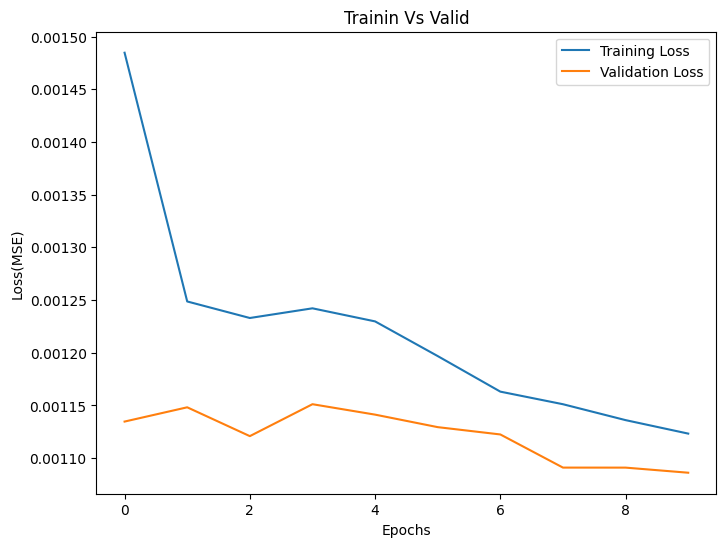

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


KeyError: 'predicted_class'

In [ ]:

#data features

data = pd.read_csv("creditcard.csv")
X = data.drop(["Time" , "Class"] , axis = 1)
y = data["Class"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train = X_scaled[y==0]
X_test = X_scaled[y==1]

#Autoencoder

dim = X_train.shape[1]
input_layer = Input(shape=(dim,))
encoder = Dense(16 , activation="relu")(input_layer)
encoder = Dense(8 , activation="relu")(encoder)
latent = Dense(4 , activation="relu")(encoder)
decoder = Dense(8 , activation="relu")(latent)
decoder = Dense(16 , activation = "relu")(decoder)
output_layer = Dense(dim , activation="sigmoid")(decoder)

model = Model(input_layer , output_layer)
model.compile(optimizer = Adam(learning_rate = 0.01) , loss = "mse" , metrics = ["mae"])


#train model

history = model.fit(
  X_train , X_train,
  epochs = 10,
  batch_size = 64,
  shuffle = True,
  validation_split = 0.1
)

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'] , label = "Training Loss")
plt.plot(history.history['val_loss'] , label = "Validation Loss")
plt.title("Trainin Vs Valid")
plt.xlabel("Epochs")
plt.ylabel("Loss(MSE)")
plt.legend()
plt.show()


#reconstruction
reconstructed = model.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstructed) , axis = 1)

data["err"] = mse
data["predicted"] = np.where(data["err"] > 0.001 , 1 , 0)


fraud_cases = data[data["Class"] == 1]
correctly_predicted = fraud_cases[fraud_cases["predicted"] == 1]

print("Actual fraud cases:", len(fraud_cases))
print("Correctly predicted frauds:", len(correctly_predicted))
print("Detection accuracy: {:.2f}%".format((len(correctly_predicted) / len(fraud_cases)) * 100))

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense
